In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The following line is needed to download the example FITS files used in this tutorial.

In [2]:
from astropy.utils.data import download_file

# Viewing and manipulating data from FITS tables

In [3]:
from astropy.io import fits

FITS files can often contain large amount of multi-dimensional data and tables.  

In this particular example, I will open a FITS file from a Chandra observation of the Galactic Center.  The file contains a list of events with x and y coordinates, energy, and various other pieces of information.

In [4]:
event_filename = download_file( 'http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', cache=True )

## Opening the FITS file and viewing table contents

Since the file is big, I will open with `memmap=True` to prevent RAM storage issues.

In [6]:
hdu_list = fits.open(event_filename, memmap=True)

In [7]:
hdu_list.info()

Filename: chandra_events.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      35   ()              
1    EVENTS      BinTableHDU    878   1232743R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
2    GTI         BinTableHDU     28   3R x 2C      [1D, 1D]   
3    GTI         BinTableHDU     28   4R x 2C      [1D, 1D]   
4    GTI         BinTableHDU     28   5R x 2C      [1D, 1D]   
5    GTI         BinTableHDU     28   3R x 2C      [1D, 1D]   
6    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   


I'm interested in reading EVENTS, which contains information about each X-ray photon that hit the detector.

To find out what information the table contains, I will print the column names.

In [8]:
print(hdu_list[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'
    name = 'chipy'; format = '1I'; unit = 'pixel'
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'
    name = 'dety'; format = '1E'; unit = 'pixel'
    name = 'x'; format = '1E'; unit = 'pixel'
    name = 'y'; format = '1E'; unit = 'pixel'
    name = 'pha'; format = '1J'; unit = 'adu'; null = 0
    name = 'pha_ro'; format = '1J'; unit = 'adu'; null = 0
    name = 'energy'; format = '1E'; unit = 'eV'
    name = 'pi'; format = '1J'; unit = 'chan'; null = 0
    name = 'fltgrade'; format = '1I'
    name = 'grade'; format = '1I'
    name = 'status'; format = '32X'
)


Now I'll load the data into a separate variable.

In [10]:
evt_data = hdu_list[1].data

We can extract data from the table by referencing the column name.

For example, I'll make a histogram for the energy of each photon, giving us a sense for the spectrum (folded with the detector's efficiency).

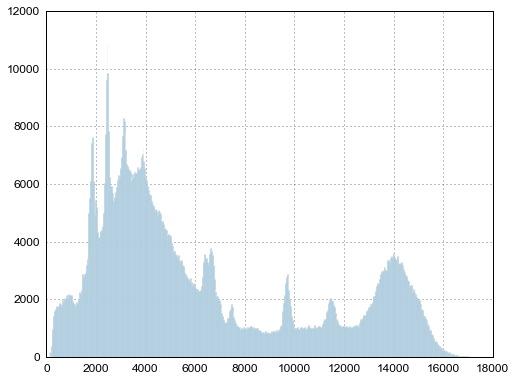

In [11]:
NBINS = 500
energy_hist = plt.hist(evt_data['energy'], NBINS)

## Making a 2-D histogram with some table data

I will make an image by binning the x and y coordinates of the events into a 2-D histogram.

In [13]:
x = evt_data['x']
y = evt_data['y']

This particular observation spans five CCD chips.  Here I will pick events that only fell on the main (ACIS-I) chips, which have number ids 0, 1, 2, and 3.

In [23]:
ii = np.any([evt_data['ccd_id'] == i for i in [0,1,2,3]], axis=0)

### Method 1: Use numpy to make a 2-D histogram and imshow to display it

This method allowed me to create an image without stretching

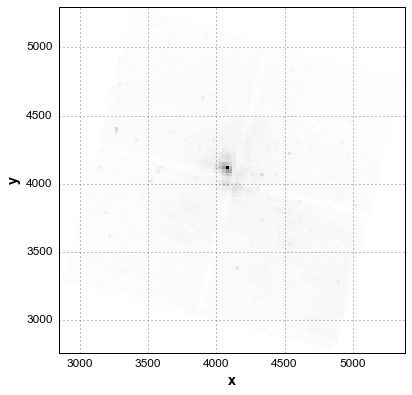

In [29]:
NBINS = (100,100)

img_zero, yedges, xedges = np.histogram2d(evt_data['x'][ii], evt_data['y'][ii], NBINS)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(img_zero, extent=extent, interpolation='nearest', cmap='gist_yarg', origin='lower')

plt.xlabel('x')
plt.ylabel('y')

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

### Method 2: Use hist2d with a log-normal color scheme

In [30]:
from matplotlib.colors import LogNorm

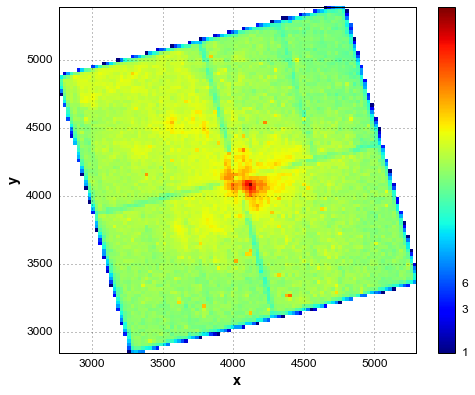

In [33]:
NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['x'][ii], evt_data['y'][ii], NBINS, cmap='jet', norm=LogNorm())

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

## Close the FITS file

In [34]:
hdu_list.close()

## Exercises

Make a scatter plot of the same data you histogrammed above.  The [plt.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function is your friend for this.  What are the pros and cons of doing this?

Try the same with the [plt.hexbin](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin) plotting function. Which do you think looks better for this kind of data?